# Baseline Titanic challenge Solution

### Data Description
The titanic challenge is a challenge on the predominant titanic event that took place years ago at ..... where we had alot of people on a ship. Unfortunately, the ship collided with an iceberg which led to the sinking of the ship and loss of so many lives. 
This challenge is therefore put forth from the details gotten regarding people on the ship who survived and those who didnt. The challenge is all about you (the data scienctist)  build a predictive model which is able to determine peoples survival. 
### The Data Set
The data set is avaliable on kaggle and can be accessed using the link below:
https://www.kaggle.com/c/titanic

### Data description
    from the dataset we do have the following information stated regarding each fellow on the ship:
    *passenger_id
    *pclass
    *name
    *sex
    *age
    *sibsp
    *parch
    *ticket
    *fare
    *cabin
    *embarked
    *boat
    *body
    *home.dest
  
    
the bone of contention is to forecast the survival of a person given the details above.

    Survival in this case can be represented in binary:
    *one (1) means 'will survive'.
    *zero (0) means 'will not survive'.
    
Let's get to coding. Let's begin by importing the necessary libaries that are relevant to modelling this problem and solving it.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys
import warnings
warnings.filterwarnings('ignore')


let's read in the data using pandas method called read_csv for reading in, csv files.

In [2]:
train = pd.read_csv('titanic/train.csv')

test= pd.read_csv('titanic/test.csv')
train.shape, test.shape

((891, 12), (418, 11))

let's take a look at the first 5 entries of our data just to have grasp of how our data looks like.

In [3]:
data = train.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the dimension of the data we have

In [4]:
# to know the dimension of my data
data.shape

(891, 12)

# filling NAN, an removing rough columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Cabin

In [72]:
550/891

0.6172839506172839

In [6]:
data = data.drop(['Cabin'], axis = 1)


In [7]:
test = test.drop(['Cabin'], axis =1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Age

In [9]:
data['Age'].median()

28.0

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [11]:
test['Age'] = test['Age'].fillna(test['Age'].median())

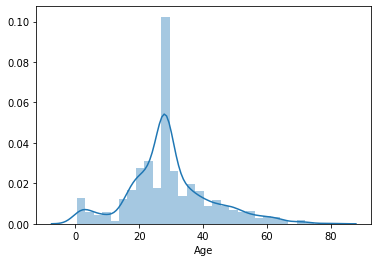

In [12]:
sns.distplot(data['Age'])


In [13]:
def trans_age(value):
    if value >15 and value < 50:
        out = 0
    else:
        out = 1
    return out

data['Age'] = data['Age'].apply(trans_age).astype(int)
test['Age'] = data['Age'].apply(trans_age).astype(int)



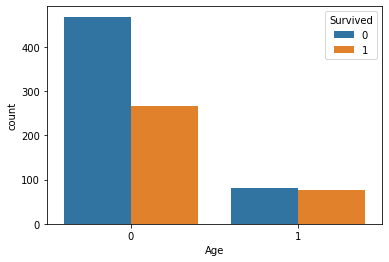

In [14]:
sns.countplot(x = 'Age', hue = 'Survived', data = data)

In [15]:
train_da = data.copy()

In [16]:
train_da.shape

(891, 11)

# Embarked

In [17]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


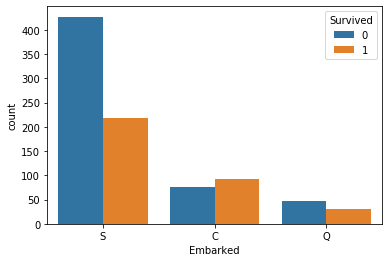

In [19]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = data)

In [20]:
np.unique(data['Embarked'])

array(['C', 'Q', 'S'], dtype=object)

In [21]:
data = pd.get_dummies(data, columns = ['Embarked'])

In [22]:
test = pd.get_dummies(test, columns = ['Embarked'])

# Name and passengerId

In [23]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [24]:
data_names = data['Name']
data = data.drop('Name', axis = 1)
test = test.drop('Name', axis = 1)

data_id = data['PassengerId']
data = data.drop('PassengerId', axis = 1)
test_id = test['PassengerId']
test = test.drop('PassengerId', axis = 1)

# PClass

In [25]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

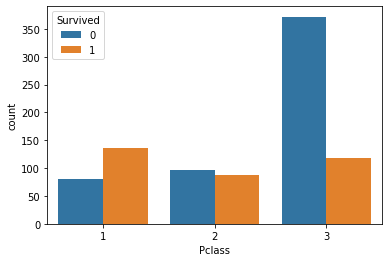

In [26]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = data)

In [27]:
data = pd.get_dummies(data, columns = ['Pclass'])
test = pd.get_dummies(test, columns = ['Pclass'])

# SibSp

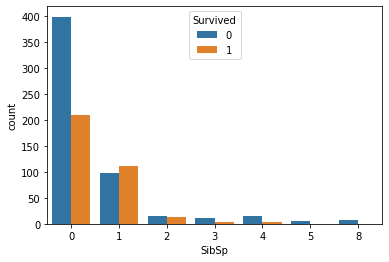

In [28]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = data)

In [29]:
data = pd.get_dummies(data, columns = ['SibSp'])
test = pd.get_dummies(test, columns = ['SibSp'])

# Tickets, Sex encoding

In [30]:
data = data.drop('Ticket', axis = 1)
test = test.drop('Ticket', axis = 1)
data = pd.get_dummies(data, columns = ['Sex'])
test = pd.get_dummies(test, columns = ['Sex'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived      891 non-null int64
Age           891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
SibSp_0       891 non-null uint8
SibSp_1       891 non-null uint8
SibSp_2       891 non-null uint8
SibSp_3       891 non-null uint8
SibSp_4       891 non-null uint8
SibSp_5       891 non-null uint8
SibSp_8       891 non-null uint8
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
dtypes: float64(1), int64(3), uint8(15)
memory usage: 41.0 KB


## Parch

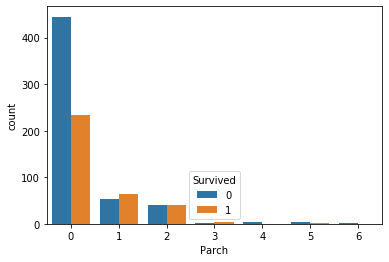

In [31]:
sns.countplot(x = 'Parch', hue = 'Survived', data = data)

In [32]:
def transform_parch(data):
    out = 0
    if data == 0:
        out = 0
    else:
        out = 1
    return out

data['Parch'] = data['Parch'].apply(transform_parch).astype(int)
test['Parch'] = test['Parch'].apply(transform_parch).astype(int)

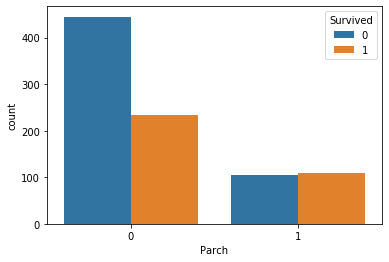

In [33]:
sns.countplot(x = 'Parch', hue = 'Survived', data = data)

# fare

In [34]:
data['Fare'].mode()[0]

8.05

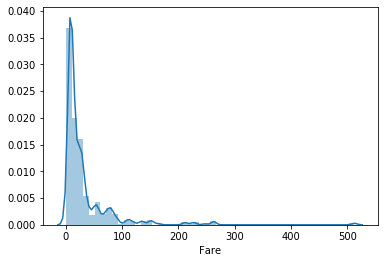

In [35]:
sns.distplot(data['Fare'])

In [36]:
def fare_bin(x):
    out = 0
    if x > 0 and x<= 80:
        out = 0
    else:
        out = 1
    return out
data['Fare'] = data['Fare'].apply(fare_bin)
test['Fare'] = test['Fare'].apply(fare_bin)
data['Fare'] = data['Fare'].astype(int)
test['Fare'] = test['Fare'].astype(int)

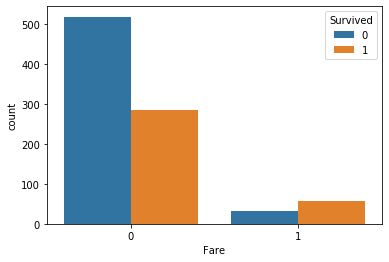

In [37]:
sns.countplot(x = 'Fare', hue = 'Survived', data = data)

In [38]:
data.shape, test.shape

((891, 19), (418, 18))

# Fare

In [39]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])

# Modelling

In [40]:
y = data['Survived']
x = data.drop('Survived', axis = 1)

In [41]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [42]:

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state = 42)


# Logistic Regression Model

In [43]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('Training score is: ',lr.score(x_train, y_train))
pred = lr.predict(x_test)
print('Testing score is: ',accuracy_score(y_test, pred))

Training score is:  0.7991573033707865
Testing score is:  0.7653631284916201


In [44]:
f1_score(y_test, pred)

0.7123287671232876

In [45]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.81      0.80       105\n           1       0.72      0.70      0.71        74\n\n    accuracy                           0.77       179\n   macro avg       0.76      0.76      0.76       179\nweighted avg       0.76      0.77      0.76       179\n'

# Random Forest Model

In [46]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train, y_train)
print('Training score is: ',rand.score(x_train, y_train))
pred = rand.predict(x_test)
print('Testing score is: ',accuracy_score(y_test, pred))

Training score is:  0.8553370786516854
Testing score is:  0.7877094972067039


In [47]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.87      0.83       105\n           1       0.78      0.68      0.72        74\n\n    accuracy                           0.79       179\n   macro avg       0.79      0.77      0.78       179\nweighted avg       0.79      0.79      0.78       179\n'

In [48]:
f1_score(y_test, pred)

0.7246376811594203

# gradient boosting classifier model

In [49]:
model_grb = GradientBoostingClassifier()
model = model_grb.fit(x_train, y_train)
y_pred = model_grb.predict(x_test)
print('train score: ', model_grb.score(x_train, y_train))
print('test score: ' , accuracy_score(y_test, y_pred))


train score:  0.8370786516853933
test score:  0.7821229050279329


In [50]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.88      0.83       105\n           1       0.79      0.65      0.71        74\n\n    accuracy                           0.78       179\n   macro avg       0.78      0.76      0.77       179\nweighted avg       0.78      0.78      0.78       179\n'

In [51]:
f1_score(y_test,y_pred)

0.711111111111111

# XGB Classifier model

In [52]:
model_xgb = XGBClassifier()

    
model = model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)
print('train score: ', model_xgb.score(x_train, y_train))
print('test score: ',  accuracy_score(y_test, y_pred))


train score:  0.8539325842696629
test score:  0.8100558659217877


In [53]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.90      0.85       105\n           1       0.83      0.68      0.75        74\n\n    accuracy                           0.81       179\n   macro avg       0.82      0.79      0.80       179\nweighted avg       0.81      0.81      0.81       179\n'

In [54]:
f1_score(y_test, y_pred)

0.746268656716418

# my prediction

In [55]:
test.shape, x_train.shape

((418, 18), (712, 18))

In [56]:
gradient_boost_prediction= model_grb.predict(test)
random_forest_prediction= rand.predict(test)
logistic_regression_prediction= lr.predict(test)
xgboost_prediction= model_xgb.predict(test)


# Gradient boosting submission file

In [57]:
frame_dict = {}
frame_dict['PassengerId'] = test_id
frame_dict['Survived'] = gradient_boost_prediction
frame = pd.DataFrame(frame_dict)
frame.to_csv('gradient_boost.csv', index= False)

# Random forest submission file

In [58]:
frame_dict = {}
frame_dict['PassengerId'] = test_id
frame_dict['Survived'] = random_forest_prediction
frame = pd.DataFrame(frame_dict)
frame.to_csv('random_forest.csv', index= False)

# logistic regression submission file

In [59]:
frame_dict = {}
frame_dict['PassengerId'] = test_id
frame_dict['Survived'] = logistic_regression_prediction
frame = pd.DataFrame(frame_dict)
frame.to_csv('logistic_regression.csv', index= False)

# Xgboost Submission file

In [60]:
frame_dict = {}
frame_dict['PassengerId'] = test_id
frame_dict['Survived'] = xgboost_prediction
frame = pd.DataFrame(frame_dict)
frame.to_csv('xgboost.csv', index= False)

# Conclusion
on submission to https://www.kaggle.com/c/titanic we had a baseline submission of 77.5% which
implies if we can optimize the model, do more transformation, we can have a better submission. Good luck!!!